# CHAPTER 11 Time Series（时间序列）

时间序列指能在任何能在时间上观测到的数据。很多时间序列是有固定频率（fixed frequency）的，意思是数据点会遵照某种规律定期出现，比如每15秒，每5分钟，或每个月。时间序列也可能是不规律的（irregular），没有一个固定的时间规律。如何参照时间序列数据取决于我们要做什么样的应用，我们可能会遇到下面这些：

- Timestamps（时间戳），具体的某一个时刻
- Fixed periods（固定的时期），比如2007年的一月，或者2010年整整一年
- Intervals of time（时间间隔），通常有一个开始和结束的时间戳。Periods（时期）可能被看做是Intervals（间隔）的一种特殊形式。
- Experiment or elapsed time（实验或经过的时间）；每一个时间戳都是看做是一个特定的开始时间（例如，在放入烤箱后，曲奇饼的直径在每一秒的变化程度）

这一章主要涉及前三个类型。

> pandas也支持基于timedeltas的index，本书不会对timedelta index做介绍，感兴趣的可以查看pandas的文档。


# 11.1 Date and Time Data Types and Tools（日期和时间数据类型及其工具）

python有标准包用来表示时间和日期数据。datetime, time, calendar，这些模块经常被使用。datetime.datetime类型，或简单写为datetime，被广泛使用：


In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2019, 7, 16, 9, 38, 56, 818081)

In [4]:
now.year, now.month, now.day

(2019, 7, 16)

datetime能保存日期和时间到微妙级别。timedelta表示两个不同的datetime对象之间的时间上的不同：

In [6]:
# datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

我们可以在一个datetime对象上，添加或减少一个或多个timedelta，这样可以产生新的变化后的对象：

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

下表汇总了一些datetime模块中的数据类型：
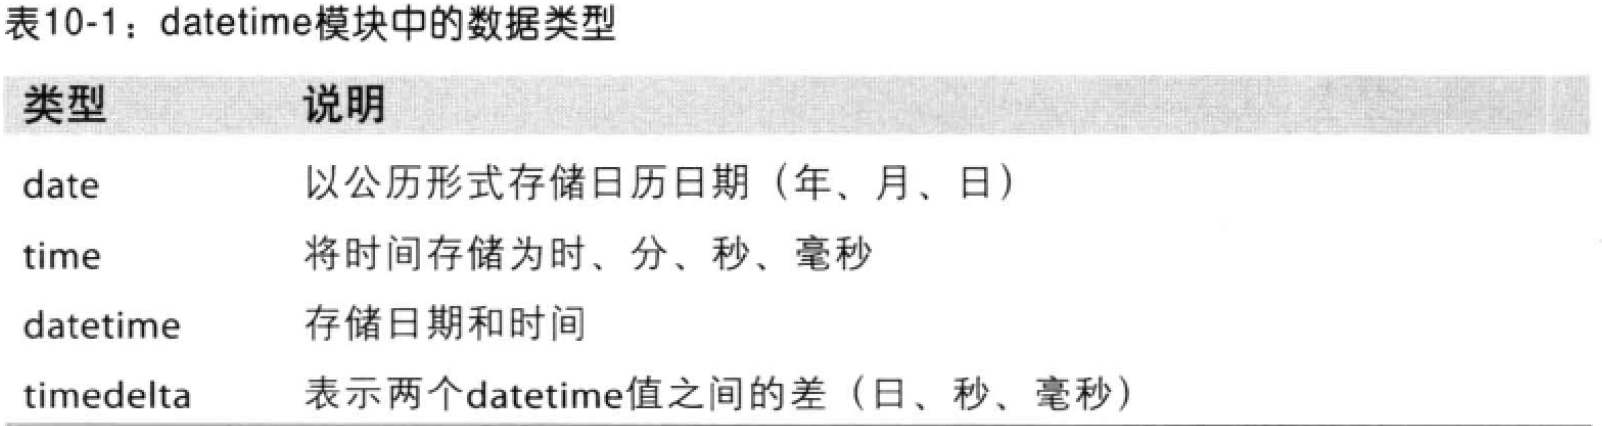

# 1 Converting Between String and Datetime（字符串与时间的转换）

我们可以对datetime对象，以及pandas的Timestamp对象进行格式化，这部分之后会介绍，使用str或strftime方法，传入一个特定的时间格式就能进行转换：

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

下表是关于日期时间类型的格式：
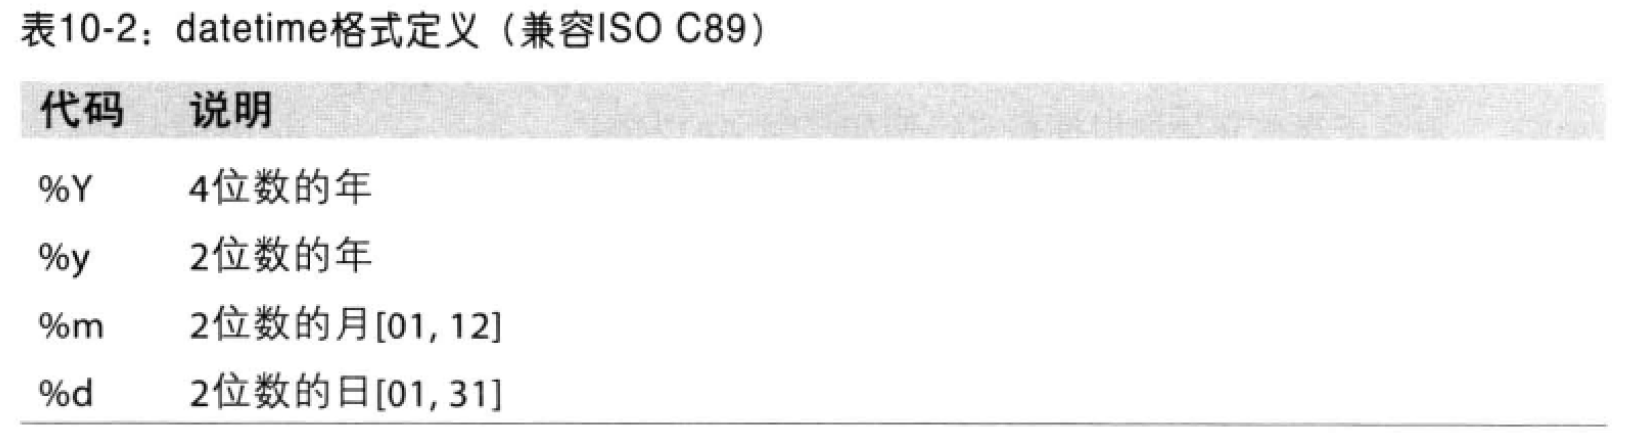
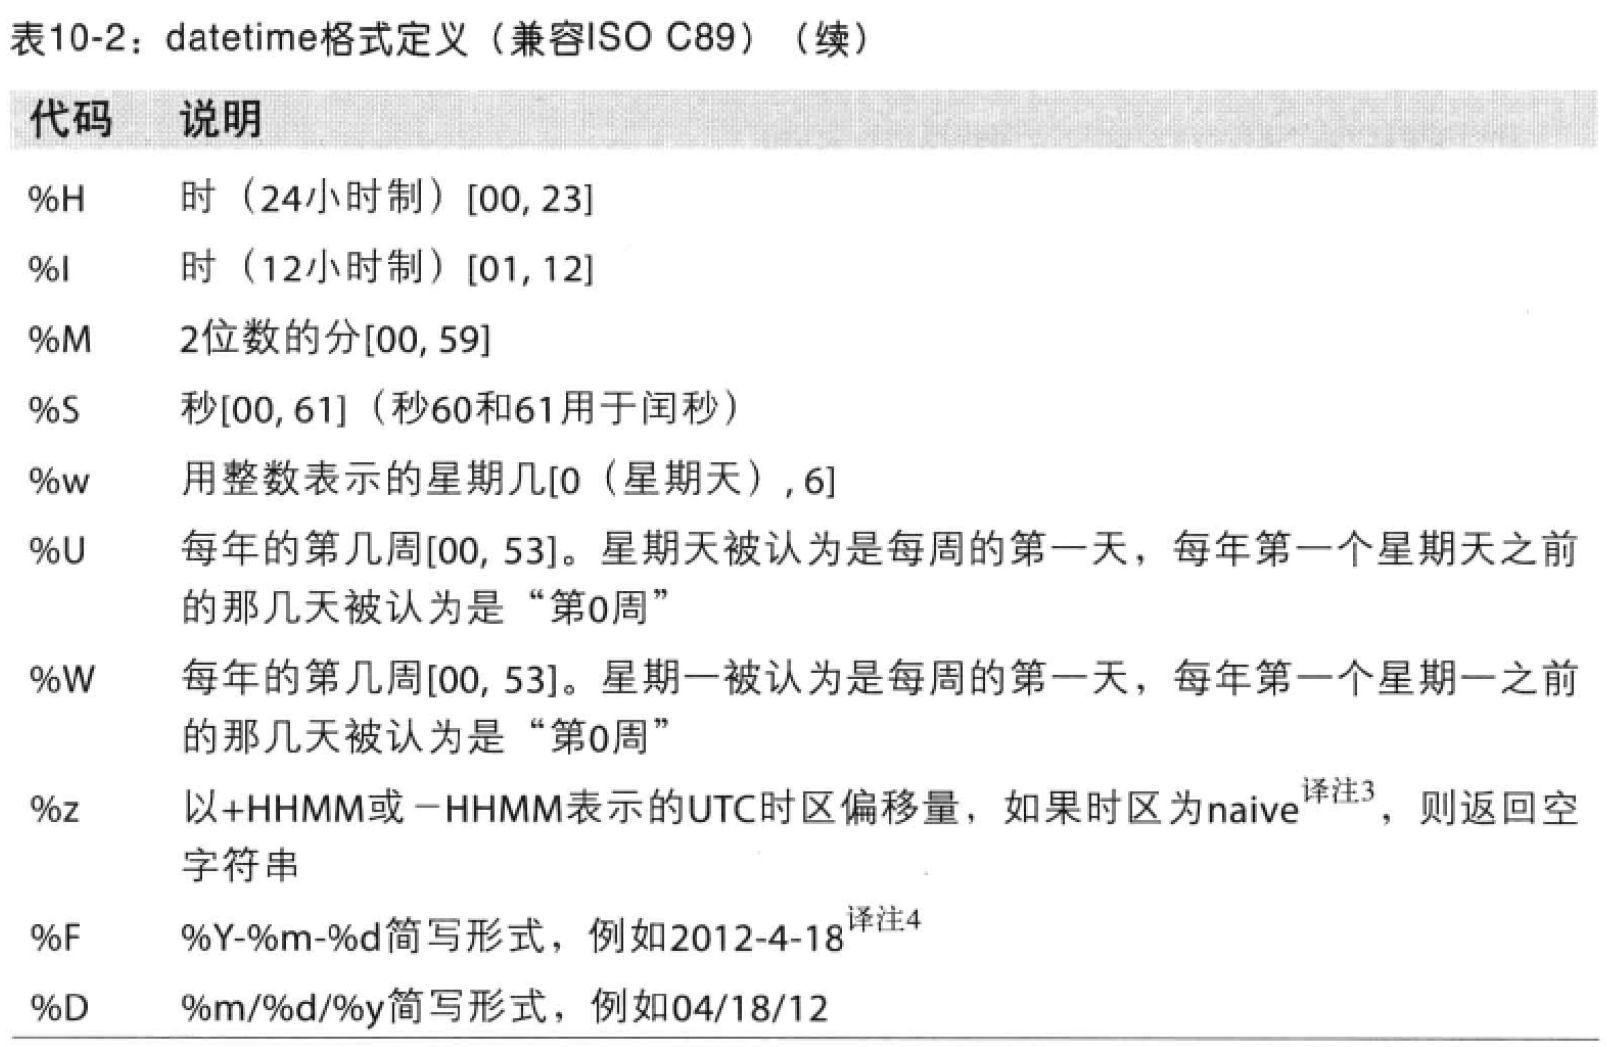
我们可以利用上面的format codes（格式码；时间日期格式）把字符串转换为日期，这要用到datetime.strptime:

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011', '8/6/2011']

In [19]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

对于一个一致的时间格式，使用datetime.strptime来解析日期是很好的方法。但是，如果每次都要写格式的话很烦人，尤其是对于一些比较常见的格式。在这种情况下，我们可以使用第三方库dateutil中的parser.parse方法（这个库会在安装pandas的时候自动安装）：

In [1]:
from dateutil.parser import parse

In [2]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

dateutil能够解析很多常见的时间表示格式：

In [22]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

在国际上，日在月之前是很常见的（译者：美国是把月放在日前面的），所以我们可以设置dayfirst=True来指明最前面的是否是日：

In [23]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas通常可以用于处理由日期组成的数组，不论是否是DataFrame中的行索引或列。to_datetime方法能解析很多不同种类的日期表示。标准的日期格式，比如ISO 8601，能被快速解析：

In [24]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [28]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

还能处理一些应该被判断为缺失的值（比如None, 空字符串之类的）：

In [29]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [30]:
idx[2]

NaT

In [31]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

Nat(Not a Time)在pandas中，用于表示时间戳为空值（null value）。

> dateutil.parse是一个很有用但不完美的工具。它可能会把一些字符串识别为日期，例如，'42'就会被解析为2042年加上今天的日期。

datetime对象还有一些关于地区格式（locale-specific formatting）的选项，用于处理不同国家或不同语言的问题。例如，月份的缩写在德国和法国，与英语是不同的。下表列出一些相关的选项：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/gp2fy.png)

# 11.2 Time Series Basics（时间序列基础）

在pandas中，一个基本的时间序列对象，是一个用时间戳作为索引的Series，在pandas外部的话，通常是用python 字符串或datetime对象来表示的：

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

In [4]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8), 
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [5]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.251061
2011-01-05    0.172149
2011-01-07   -0.067401
2011-01-08    0.053581
2011-01-10   -0.059480
2011-01-12   -0.580883
dtype: float64

上面的转化原理是，datetime对象被放进了DatetimeIndex:

In [7]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

像其他的Series一行，数值原色会自动按时间序列索引进行对齐：

In [9]:
ts[::2]

2011-01-02    0.384868
2011-01-07    2.553288
2011-01-10    1.180570
dtype: float64

In [10]:
ts + ts[::2]

2011-01-02    0.769735
2011-01-05         NaN
2011-01-07    5.106575
2011-01-08         NaN
2011-01-10    2.361140
2011-01-12         NaN
dtype: float64

ts[::2]会在ts中，每隔两个元素选一个元素。

pandas中的时间戳，是按numpy中的datetime64数据类型进行保存的，可以精确到纳秒的级别：

In [6]:
ts.index.dtype

dtype('<M8[ns]')

DatetimeIndex的标量是pandas的Timestamp对象：

In [12]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

Timestamp可以在任何地方用datetime对象进行替换。

# 1 Indexing, Selection, Subsetting（索引，选择，取子集）

当我们基于标签进行索引和选择时，时间序列就像是pandas.Series：

In [15]:
ts

2011-01-02    0.384868
2011-01-05    0.669181
2011-01-07    2.553288
2011-01-08   -1.808783
2011-01-10    1.180570
2011-01-12   -0.928942
dtype: float64

In [13]:
stamp = ts.index[2]

In [14]:
ts[stamp]

2.5532875030792592

为了方便，我们可以直接传入一个字符串用来表示日期：

In [16]:
ts['1/10/2011']

1.1805698813038874

In [17]:
ts['20110110']

1.1805698813038874

对于比较长的时间序列，我们可以直接传入一年或一年一个月，来进行数据选取：

In [19]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.801668
2000-01-02   -0.325797
2000-01-03    0.047318
2000-01-04    0.239576
2000-01-05   -0.467691
2000-01-06    1.394063
2000-01-07    0.416262
2000-01-08   -0.739839
2000-01-09   -1.504631
2000-01-10   -0.798753
2000-01-11    0.758856
2000-01-12    1.163517
2000-01-13    1.233826
2000-01-14    0.675056
2000-01-15   -1.079219
2000-01-16    0.212076
2000-01-17   -0.242134
2000-01-18   -0.318024
2000-01-19    0.040686
2000-01-20   -1.342025
2000-01-21   -0.130905
2000-01-22   -0.122308
2000-01-23   -0.924727
2000-01-24    0.071544
2000-01-25    0.483302
2000-01-26   -0.264231
2000-01-27    0.815791
2000-01-28    0.652885
2000-01-29    0.203818
2000-01-30    0.007890
                ...   
2002-08-28   -2.375283
2002-08-29    0.843647
2002-08-30    0.069483
2002-08-31   -1.151590
2002-09-01   -2.348154
2002-09-02   -0.309723
2002-09-03   -1.017466
2002-09-04   -2.078659
2002-09-05   -1.828568
2002-09-06    0.546299
2002-09-07    0.861304
2002-09-08   -0.823128
2002-09-09 

In [20]:
longer_ts['2001']

2001-01-01    0.588405
2001-01-02   -3.027909
2001-01-03   -0.492280
2001-01-04   -0.807809
2001-01-05   -0.124139
2001-01-06   -0.198966
2001-01-07    2.015447
2001-01-08    1.454119
2001-01-09    0.157505
2001-01-10    1.077689
2001-01-11   -0.246538
2001-01-12   -0.865122
2001-01-13   -0.082186
2001-01-14    1.928050
2001-01-15    0.320741
2001-01-16    0.473770
2001-01-17    0.036649
2001-01-18    1.405034
2001-01-19    0.560502
2001-01-20   -0.695138
2001-01-21    3.318884
2001-01-22    1.704966
2001-01-23    0.145167
2001-01-24    0.366667
2001-01-25   -0.565675
2001-01-26    0.940406
2001-01-27   -1.468772
2001-01-28    0.098759
2001-01-29    0.267449
2001-01-30   -0.221643
                ...   
2001-12-02    0.002522
2001-12-03   -0.046712
2001-12-04    1.825249
2001-12-05   -1.000655
2001-12-06   -0.807582
2001-12-07    0.750439
2001-12-08    1.531707
2001-12-09   -0.195239
2001-12-10   -0.087465
2001-12-11   -0.041450
2001-12-12    1.992200
2001-12-13   -0.294916
2001-12-14 

这里，字符串'2001'就直接被解析为一年，然后选中这个时期的数据。我们也可以指定月份：

In [21]:
longer_ts['2001-05']

2001-05-01   -0.560227
2001-05-02    2.160259
2001-05-03   -0.826092
2001-05-04   -0.183020
2001-05-05   -0.294708
2001-05-06   -1.210785
2001-05-07    0.609260
2001-05-08   -1.155377
2001-05-09   -0.127132
2001-05-10    0.576327
2001-05-11   -0.955206
2001-05-12   -2.002019
2001-05-13   -0.969865
2001-05-14    0.820993
2001-05-15    0.557336
2001-05-16   -0.262222
2001-05-17   -0.086760
2001-05-18    0.151608
2001-05-19    1.097604
2001-05-20    0.212148
2001-05-21   -1.164944
2001-05-22   -0.100020
2001-05-23    0.734738
2001-05-24    1.730438
2001-05-25    1.352858
2001-05-26    0.644984
2001-05-27    0.997554
2001-05-28    1.434452
2001-05-29    0.395946
2001-05-30   -0.142523
2001-05-31    1.205485
Freq: D, dtype: float64

利用datetime进行切片（slicing）也没问题：

In [22]:
ts[datetime(2011, 1, 7)]

2.5532875030792592

因为大部分时间序列是按年代时间顺序来排列的，我们可以用时间戳来进行切片，选中一段范围内的时间：

In [23]:
ts

2011-01-02    0.384868
2011-01-05    0.669181
2011-01-07    2.553288
2011-01-08   -1.808783
2011-01-10    1.180570
2011-01-12   -0.928942
dtype: float64

In [24]:
ts['1/6/2011':'1/11/2011']

2011-01-07    2.553288
2011-01-08   -1.808783
2011-01-10    1.180570
dtype: float64

记住，这种方式的切片得到的只是原来数据的一个视图，如果我们在切片的结果上进行更改的的，原来的数据也会变化。

有一个相等的实例方法（instance method）也能切片，truncate，能在两个日期上，对Series进行切片：

In [25]:
ts.truncate(after='1/9/2011')

2011-01-02    0.384868
2011-01-05    0.669181
2011-01-07    2.553288
2011-01-08   -1.808783
dtype: float64

所有这些都适用于DataFrame，我们对行进行索引：

In [26]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [27]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [28]:
long_df.loc['5-2001']

Colorado     Texas  New York      Ohio
2001-05-02 -0.477517  0.722685  0.337141 -0.345072
2001-05-09 -0.401860 -0.475821  0.685129 -0.809288
2001-05-16  1.900541  0.348590 -0.805042 -0.410077
2001-05-23 -0.220870  1.654666 -0.846395 -0.207802
2001-05-30  2.094319 -0.972588  1.276059 -1.056146

# 2 Time Series with Duplicate Indices（重复索引的时间序列）

在某些数据中，可能会遇到多个数据在同一时间戳下的情况：

In [29]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', 
                          '1/2/2000', '1/3/2000'])

In [31]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

我们通过is_unique属性来查看index是否是唯一值：

In [32]:
dup_ts.index.is_unique

False

对这个时间序列取索引的的话， 要么得到标量，要么得到切片，这取决于时间戳是否是重复的：

In [33]:
dup_ts['1/3/2000'] # not duplicated

4

In [34]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

假设我们想要聚合那些有重复时间戳的数据，一种方法是用groupby，设定level=0：

In [35]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [36]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting（日期范围，频度，和位移）

普通的时间序列通常是不规律的，但我们希望能有一个固定的频度，比如每天，每月，或没15分钟，即使有一些缺失值也没关系。幸运的是，pandas中有一套方法和工具来进行重采样，推断频度，并生成固定频度的日期范围。例如，我们可以把样本时间序列变为固定按日的频度，需要调用resample：

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime


dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8), 
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.672023
2011-01-05    1.449923
2011-01-07   -0.268998
2011-01-08   -0.611634
2011-01-10    0.804177
2011-01-12   -0.795859
dtype: float64

In [9]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

这里的'D'表示按日的频度（daily frequency）。
关于频度（frequency）和重采样（resampling）的转换，会在11.6进行具体介绍，这里我们展示一些基本的用法。
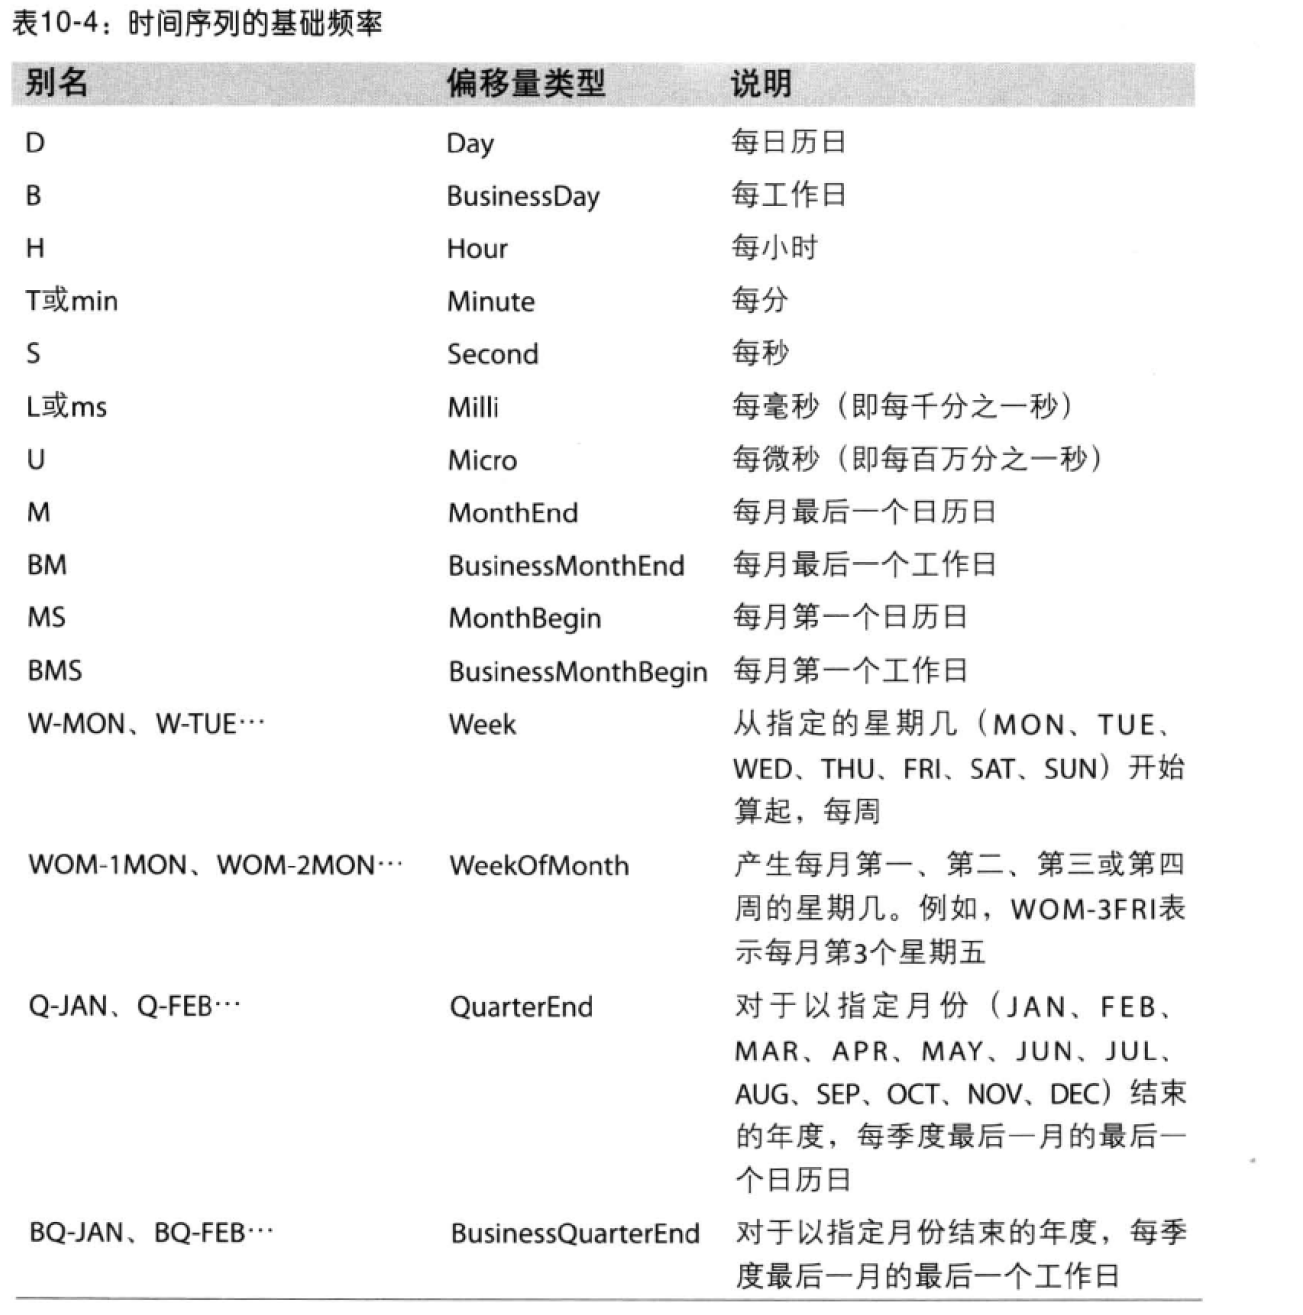
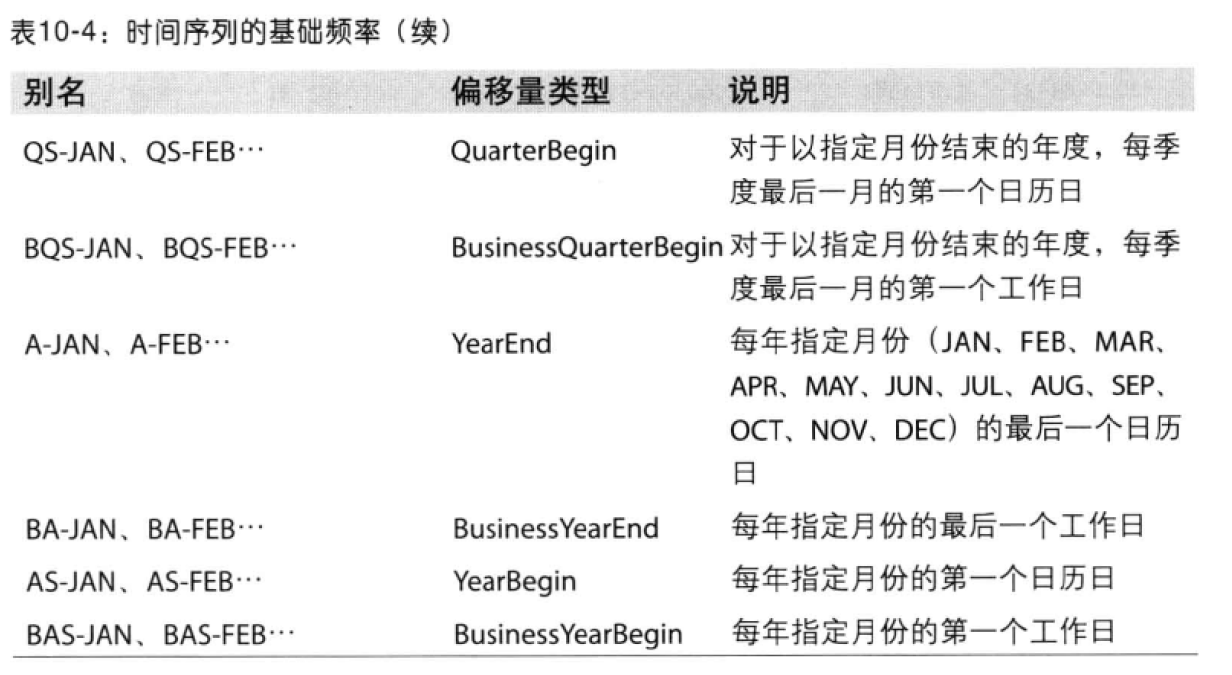
# 1 Generating Date Ranges（生成日期范围）

之前虽然用过，但没有做解释，其实pandas.date_range是用来生成DatetimeIndex的，使用时要根据频度来指明长度：

In [4]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

默认，date_range会生成按日频度的时间戳。如果我们只传入一个开始或一个结束时间，还必须传入一个数字来表示时期：

In [5]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [6]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

开始和结束的日期，严格指定了用于生成日期索引（date index）的边界。例如，如果我们希望日期索引包含每个月的最后一个工作日，我们要设定频度为'BM'(business end of month，每个月的最后一个工作日，更多频度可以看下面的表格)，而且只有在这个日期范围内的日期会被包含进去：

In [7]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

时间序列频度：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/v4ae4.png)

date_range会默认保留开始或结束的时间戳：

In [8]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

有些时候我们的时间序列数据带有小时，分，秒这样的信息，但我们想要让这些时间戳全部归一化到午夜（normalized to midnight, 即晚上0点），这个时候要用到normalize选项：

In [15]:
nor_date = pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)
nor_date

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
nor_date[0]

Timestamp('2012-05-02 00:00:00', offset='D')

可以看到小时，分，秒全部变为0

# 2 Frequencies and Date Offsets（频度和日期偏移）

pandas中的频度由一个基本频度（base frequency）和一个乘法器（multiplier）组成。基本频度通常用一个字符串别名（string alias）来代表，比如'M'表示月，'H'表示小时。对每一个基本频度，还有一个被称之为日期偏移（date offset）的对象。例如，小时频度能用Hour类来表示：

In [18]:
from pandas.tseries.offsets import Hour, Minute

In [19]:
hour = Hour()
hour

<Hour>

通过传入一个整数，我们可以定义一个乘以偏移的乘法（a multiple of an offset）：

In [20]:
four_hours = Hour(4)
four_hours

<4 * Hours>

在很多情况下，我们不需要创建这些对象，而是使用字符串别名，比如'H'或'4H'。在频度前加一个整数，就能作为一个乘法器：

In [21]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

很多偏移(offset)还能和加法结合：

In [22]:
Hour(2) + Minute(30)

<150 * Minutes>

同样的，我们可以传入频度字符串，比如'1h30min'，这种表达也能被解析：

In [23]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Week of month dates（月中的第几周日期）

一个有用的类（class）是月中的第几周（Week of month），用WOM表示。丽日我们想得到每个月的第三个星期五：


In [26]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [27]:
list(rng)

[Timestamp('2012-01-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', offset='WOM-3FRI')]

# 3 Shifting (Leading and Lagging) Data （偏移（提前与推后）数据）

偏移（shifting）表示按照时间把数据向前或向后推移。Series和DataFrame都有一个shift方法实现偏移，索引（index）不会被更改：

In [28]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.050276
2000-02-29    0.080201
2000-03-31    1.548324
2000-04-30    0.510664
Freq: M, dtype: float64

In [29]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.050276
2000-04-30    0.080201
Freq: M, dtype: float64

In [30]:
ts.shift(-2)

2000-01-31    1.548324
2000-02-29    0.510664
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

当我们进行位移的时候，就像上面这样会引入缺失值。

shift的一个普通的用法是计算时间序列的百分比变化，可以表示为：

In [31]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29    -2.595227
2000-03-31    18.305554
2000-04-30    -0.670183
Freq: M, dtype: float64

因为普通的shift不会对index进行修改，一些数据会被丢弃。因此如果频度是已知的，可以把频度传递给shift，这样的话时间戳会自动变化：

In [33]:
ts

2000-01-31   -0.050276
2000-02-29    0.080201
2000-03-31    1.548324
2000-04-30    0.510664
Freq: M, dtype: float64

In [34]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.050276
2000-04-30    0.080201
Freq: M, dtype: float64

In [32]:
ts.shift(2, freq='M')

2000-03-31   -0.050276
2000-04-30    0.080201
2000-05-31    1.548324
2000-06-30    0.510664
Freq: M, dtype: float64

其他一些频度也可以导入，能让我们前后移动数据：

In [35]:
ts.shift(3, freq='D')

2000-02-03   -0.050276
2000-03-03    0.080201
2000-04-03    1.548324
2000-05-03    0.510664
dtype: float64

In [36]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.050276
2000-02-29 01:30:00    0.080201
2000-03-31 01:30:00    1.548324
2000-04-30 01:30:00    0.510664
Freq: M, dtype: float64

T表示分钟。


### Shifting dates with offsets（用偏移量来移动日期）

pandas的日期偏移（date offset）能被用于datetime或Timestamp对象：

In [37]:
from pandas.tseries.offsets import Day, MonthEnd

In [38]:
now = datetime(2011, 11, 17)

In [39]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

如果我们添加一个像MonthEnd这样的anchored offset(依附偏移；锚点位置)，日期会根据频度规则进行递增：

In [40]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [41]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

依附偏移可以让日期向前或向后滚动，利用rollforward和rollback方法：

In [43]:
offset = MonthEnd()

In [44]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [45]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

一个比较创造性的日期偏移（date offset）用法是配合groupby一起用：

In [46]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.362927
2000-01-19   -1.107020
2000-01-23   -0.629370
2000-01-27   -0.730651
2000-01-31    0.251607
2000-02-04    0.002611
2000-02-08   -0.049611
2000-02-12   -0.170408
2000-02-16   -1.512385
2000-02-20    1.335117
2000-02-24   -0.393943
2000-02-28    0.087478
2000-03-03    0.441593
2000-03-07   -0.940983
2000-03-11   -1.399163
2000-03-15    0.901478
2000-03-19    0.392408
2000-03-23   -0.512613
2000-03-27    0.026952
2000-03-31    1.200684
Freq: 4D, dtype: float64

In [47]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.370501
2000-02-29   -0.100163
2000-03-31    0.013794
dtype: float64

一个简单且快捷的方式是用resample(11.6会进行更详细的介绍)：

In [48]:
ts.resample('M').mean()

2000-01-31   -0.370501
2000-02-29   -0.100163
2000-03-31    0.013794
Freq: M, dtype: float64

# 11.4 Time Zone Handling（时区处理）

> 格林威治标准时间GMT

> 十七世纪，格林威治皇家天文台为了海上霸权的扩张计画而进行天体观测。1675年旧皇家观测所(Old Royal Observatory) 正式成立，到了1884年决定以通过格林威治的子午线作为划分地球东西两半球的经度零度。观测所门口墙上有一个标志24小时的时钟，显示当下的时间，对全球而言，这里所设定的时间是世界时间参考点，全球都以格林威治的时间作为标准来设定时间，这就是我们耳熟能详的「格林威治标准时间」(Greenwich Mean Time，简称G.M.T.)的由来，标示在手表上，则代表此表具有两地时间功能，也就是同时可以显示原居地和另一个国度的时间。
 
 
> 世界协调时间UTC

> 多数的两地时间表都以GMT来表示，但也有些两地时间表上看不到GMT字样，出现的反而是UTC这3个英文字母，究竟何谓UTC？事实上，UTC指的是Coordinated Universal Time－ 世界协调时间（又称世界标准时间、世界统一时间），是经过平均太阳时(以格林威治时间GMT为准)、地轴运动修正后的新时标以及以「秒」为单位的国际原子时所综合精算而成的时间，计算过程相当严谨精密，因此若以「世界标准时间」的角度来说，UTC比GMT来得更加精准。其误差值必须保持在0.9秒以内，若大于0.9秒则由位于巴黎的国际地球自转事务中央局发布闰秒，使UTC与地球自转周期一致。所以基本上UTC的本质强调的是比GMT更为精确的世界时间标准，不过对于现行表款来说，GMT与UTC的功能与精确度是没有差别的。

时区可以理解为UTC的偏移（offset），例如，在夏令时，纽约时间落后于UTC时间四个小时，而在一年的其他时间里，纽约时间落后于UTC时间五个小时。

在python中，时区信息来自第三方的pytz库，这个库利用的是奥尔森数据库，这个数据库汇集了世界时区信息。这个信息对于历史数据很重要，因为夏令时（daylight saving time，DST）的交接日（transition date）取决于当地政府的心血来潮。在美国，自1900年后，夏令时的交接日已经被改了很多次。

关于pytz库的更多信息，需要查看相关的文档。本书中pandas包含了一些pytz的功能，除了时区的名字，其他的API都不用去查。时区名字可以通过下面的方法获得：

In [1]:
import pytz

In [2]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

想要从pytz中得到一个时区对象（time zone object），使用pytz.timezone:

In [3]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

# 1 Time Zone Localization and Conversion（时区定位和转换）

默认的，pandas中的时间序列是time zone naive（朴素时区）。例如，考虑下面的时间序列：

In [9]:
import pandas as pd
import numpy as np

In [10]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [11]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    1.001642
2012-03-10 09:30:00   -1.277818
2012-03-11 09:30:00    0.481214
2012-03-12 09:30:00    0.738525
2012-03-13 09:30:00    0.396482
2012-03-14 09:30:00   -0.269782
Freq: D, dtype: float64

索引的tz部分是None：

In [13]:
print(ts.index.tz)

None


日期范围也能通过时区集合（time zone set）来创建：

In [15]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

使用tz_localize方法，可以实现从朴素到本地化（naive to localized）的转变：

In [16]:
ts

2012-03-09 09:30:00    1.001642
2012-03-10 09:30:00   -1.277818
2012-03-11 09:30:00    0.481214
2012-03-12 09:30:00    0.738525
2012-03-13 09:30:00    0.396482
2012-03-14 09:30:00   -0.269782
Freq: D, dtype: float64

In [18]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    1.001642
2012-03-10 09:30:00+00:00   -1.277818
2012-03-11 09:30:00+00:00    0.481214
2012-03-12 09:30:00+00:00    0.738525
2012-03-13 09:30:00+00:00    0.396482
2012-03-14 09:30:00+00:00   -0.269782
Freq: D, dtype: float64

In [19]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

一旦时间序列被定位到某个时区，那么它就可以被转换为任何其他时区，使用tz_convert：

In [21]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    1.001642
2012-03-10 04:30:00-05:00   -1.277818
2012-03-11 05:30:00-04:00    0.481214
2012-03-12 05:30:00-04:00    0.738525
2012-03-13 05:30:00-04:00    0.396482
2012-03-14 05:30:00-04:00   -0.269782
Freq: D, dtype: float64

在处理时间序列的时候，我们可以先把时间定位到纽约时间，然后转换到柏林时间：

In [22]:
ts_eastern = ts.tz_localize('America/New_York')

In [23]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    1.001642
2012-03-10 14:30:00+00:00   -1.277818
2012-03-11 13:30:00+00:00    0.481214
2012-03-12 13:30:00+00:00    0.738525
2012-03-13 13:30:00+00:00    0.396482
2012-03-14 13:30:00+00:00   -0.269782
Freq: D, dtype: float64

In [24]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    1.001642
2012-03-10 15:30:00+01:00   -1.277818
2012-03-11 14:30:00+01:00    0.481214
2012-03-12 14:30:00+01:00    0.738525
2012-03-13 14:30:00+01:00    0.396482
2012-03-14 14:30:00+01:00   -0.269782
Freq: D, dtype: float64

tz_localize和tz_convert也是DatetimeIndex上的实例方法（instance methods）：

In [25]:
ts.index.tz_localize('Asia/Shanghai') # 设置本地化

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

讲朴素的时间戳进行本地化，还会检查夏令时转换期附近是否有模糊的或不存在的时间。

# 2 Operations with Time Zone−Aware Timestamp Objects（时区的操作-意识到时间戳对象）

和时间序列或日期范围（date ranges）相似，单独的Timestamp object（时间戳对象）也能从朴素（即无时区）本地化为有时区的日期，然后就可以转换为其他时区了：

In [26]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [27]:
stamp_utc = stamp.tz_localize('utc')

In [28]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

在创建Timestamp的时候，我们可以传递一个时区：

In [29]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

有时区的Timestamp对象内部存储了一个UTC时间戳，这个值是从Unix纪元（即1907年1月1日）到现在的纳秒；这个UTC值在即使换了不同的时区，也是不变的：

In [30]:
stamp_utc.value

1299902400000000000

In [31]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

在使用pandas的DateOffset对象进行算数运算的时候，如果夏令时存在，pandas也会考虑进去。这里我们构建一个时间戳，正好出现在夏令时转换前。首先，在变为夏令时的前30分钟：

In [32]:
from pandas.tseries.offsets import Hour

In [33]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [34]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

变为夏令时的90分钟前：

In [35]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [36]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

# 3 Operations Between Diferent Time Zones（不同时区间的运算）

如果两个不同时区的时间序列被合并，那么结果为UTC。因为时间戳是以UTC为背后机制的，这种变化是直接的，不需要手动转换：

In [37]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [38]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.857427
2012-03-08 09:30:00   -0.985773
2012-03-09 09:30:00   -0.037836
2012-03-12 09:30:00   -1.561366
2012-03-13 09:30:00    0.195092
2012-03-14 09:30:00   -0.182154
2012-03-15 09:30:00    0.629671
2012-03-16 09:30:00   -1.351815
2012-03-19 09:30:00   -1.054486
2012-03-20 09:30:00    0.072799
Freq: B, dtype: float64

In [39]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2

In [40]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 11.5 Periods and Period Arithmetic（周期和周期运算）

Periods（周期）表示时间跨度（timespans），比如天，月，季，年。Period类表示的就是这种数据类型，构建的时候需要用字符串或整数，以及一个频度（关于频度的代码可以看11.4中的表格）：

In [2]:
import numpy as np
import pandas as pd

In [2]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

在这个例子里，Period对象代表了整个2007年一年的时间跨度，从1月1日到12月31日。在Period对象上进行加减，会有和对频度进行位移（shifting）一样的效果：

In [3]:
p + 5

Period('2012', 'A-DEC')

In [4]:
p - 2

Period('2005', 'A-DEC')

如果两个周期有相同的频度，二者的区别就是它们之间有多少个单元（units）：

In [5]:
pd.Period('2014', freq='A-DEC') - p

7

固定范围的周期（Regular ranges of periods）可以通过period_range函数创建：

In [6]:
rng = pd.period_range('2000-01-01', '2000-06-03', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

PeriodIndex类能存储周期组成的序列，而且可以作为任何pandas数据结构中的轴索引（axis index）：

In [8]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.439035
2000-02   -0.231125
2000-03   -1.085106
2000-04   -1.909902
2000-05    1.478810
2000-06    0.656713
Freq: M, dtype: float64

如果我们有字符串组成的数组，可以使用PeriodIndex类：

In [9]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [10]:
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

# 1 Period Frequency Conversion（周期频度转换）

通过使用asfreq方法，Periods和PeriodIndex对象能被转换为其他频度。例如，假设我们有一个年度期间（annual period），并且想要转换为月度期间（monthly period），做法非常直观：

In [11]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [12]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [13]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

我们可以认为`Period('2007', freq='A-DEC')`是某种指向时间跨度的光标，而这个时间跨度被细分为月度期间。可以看下面的图示：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/bomb8.png)

如果一个财政年度（fiscal year）是在1月结束，而不是12月，那么对应的月度期间会不一样：

In [14]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [15]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [16]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

当我们转换高频度为低频度时，pandas会根据 subperiod（次周期；子周期）的归属来决定superperiod（超周期；母周期）。例如，在A-JUN频度中，月份Aug-2007其实是个2008周期的一部分：

In [3]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [5]:
# 可以理解为以JUN 为分割，JUN即为End 月份
p= pd.Period('Jun-2007','M')
p.asfreq('A-JUN')

Period('2007', 'A-JUN')

整个PeriodIndex对象或时间序列可以被转换为一样的语义（semantics）：

In [19]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [20]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.391629
2007    0.497413
2008   -1.685639
2009    0.939885
Freq: A-DEC, dtype: float64

In [21]:
ts.asfreq('M', how='start')

2006-01    0.391629
2007-01    0.497413
2008-01   -1.685639
2009-01    0.939885
Freq: M, dtype: float64

这里，年度周期可以用月度周期替换，对应的第一个月也会包含在每个年度周期里。如果我们想要每年的最后一个工作日的话，可以使用'B'频度，并指明我们想要周期的结尾：

In [22]:
ts.asfreq('B', how='end')

2006-12-29    0.391629
2007-12-31    0.497413
2008-12-31   -1.685639
2009-12-31    0.939885
Freq: B, dtype: float64

# 2 Quarterly Period Frequencies（季度周期频度）

季度数据经常出现在会计，经济等领域。大部分季度数据都与财政年度结束日（fiscal year end）相关，比如12月最后一个工作日。因此，根据财政年度结束的不同，周期2012Q4也有不同的意义。pandas支持所有12个周期频度，从Q-JAN到Q-DEC：

In [23]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

如果是财政年度结束日在一月份，那么2012Q4代表从11月到1月，可以用日频度查看。可以看下面的图示帮助理解：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/u4btd.png)

In [24]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [25]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

因此，做些简单的周期运算也是可能的，例如，获得该季度的，第二个到最后一个工作日的，下午4点的时间戳：

In [26]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [27]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

还可以用period_range产生季度范围数据。运算方法也一样：

In [28]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [29]:
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [30]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [32]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

# 3 Converting Timestamps to Periods (and Back)（时间戳与周期相互转换）

用时间戳作为索引的Series和DataFrame对象，可以用to_period方法转变为周期：

In [6]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [35]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.556049
2000-02-29   -0.708661
2000-03-31   -0.154767
Freq: M, dtype: float64

In [37]:
pts = ts.to_period()
pts

2000-01    1.556049
2000-02   -0.708661
2000-03   -0.154767
Freq: M, dtype: float64

因为周期是不重复的时间跨度（non-overlapping timespans），一个时间戳只能属于一个有指定频度的单独周期。尽管默认情况下新的PeriodIndex的频度会从时间戳中来推测，但我们也可以自己设定想要的频度。结果中有重复的周期也没有关系：

In [8]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
rng

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [9]:
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.240973
2000-01-30   -1.745141
2000-01-31   -0.874266
2000-02-01    0.241463
2000-02-02   -0.374415
2000-02-03   -0.556646
Freq: D, dtype: float64

In [10]:
t1=ts2.to_period('M')
t1

2000-01   -0.240973
2000-01   -1.745141
2000-01   -0.874266
2000-02    0.241463
2000-02   -0.374415
2000-02   -0.556646
Freq: M, dtype: float64

想转换回时间戳的话，使用to_timestamp:

In [12]:
t1.to_timestamp()

2000-01-01   -0.240973
2000-01-01   -1.745141
2000-01-01   -0.874266
2000-02-01    0.241463
2000-02-01   -0.374415
2000-02-01   -0.556646
dtype: float64

In [11]:
pts = ts2.to_period()
pts

2000-01-29   -0.240973
2000-01-30   -1.745141
2000-01-31   -0.874266
2000-02-01    0.241463
2000-02-02   -0.374415
2000-02-03   -0.556646
Freq: D, dtype: float64

In [44]:
pts.to_timestamp(how='end')

2000-01-29    1.115254
2000-01-30   -1.813124
2000-01-31    0.970670
2000-02-01    1.306337
2000-02-02    0.673274
2000-02-03   -0.105436
Freq: D, dtype: float64

# 4 Creating a PeriodIndex from Arrays（从数组中创建一个周期索引）

有固定频度的数据集，有时会在很多列上存储时间跨度信息。例如，在下面的宏观经济数据及上，年度和季度在不同的列：

In [13]:
! cat examples/macrodata.csv|head -n 6

year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.0,0.0
1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.83,2.34,0.74
1959.0,3.0,2775.488,1751.8,289.226,491.26,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.5,5.2,180.007,2.31,1.19


In [14]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19

In [15]:
data.year[:5]

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [57]:
data.quarter[:5]

1959Q1    1.0
1959Q2    2.0
1959Q3    3.0
1959Q4    4.0
1960Q1    1.0
Freq: Q-DEC, Name: quarter, dtype: float64

通过把这些数组传递给PeriodIndex，并指定频度，我们可以把这些合并得到一个新的DataFrame：

In [16]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, 
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [19]:
data.index = index
data.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959Q1  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9   
1959Q2  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7   
1959Q3  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4   
1959Q4  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3   
1960Q1  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5   

          cpi     m1  tbilrate  unemp      pop  infl  realint  
1959Q1  28.98  139.7      2.82    5.8  177.146  0.00     0.00  
1959Q2  29.15  141.7      3.08    5.1  177.830  2.34     0.74  
1959Q3  29.35  140.5      3.82    5.3  178.657  2.74     1.09  
1959Q4  29.37  140.0      4.33    5.6  179.386  0.27     4.06  
1960Q1  29.54  139.6      3.50    5.2  180.007  2.31     1.19

In [20]:
data.infl[:5]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

# 11.6 Resampling and Frequency Conversion（重采样和频度转换）

重采样（Resampling）指的是把时间序列的频度变为另一个频度的过程。把高频度的数据变为低频度叫做降采样（downsampling），把低频度变为高频度叫做增采样（upsampling）。并不是所有的重采样都会落入上面这几个类型，例如，把W-WED（weekly on Wednesday）变为W-FRI，既不属于降采样，也不属于增采样。

pandas对象自带resampe方法，用于所有的频度变化。resample有一个和groupby类似的API；我们可以用resample来对数据进行分组，然后调用聚合函数（aggregation function）:

In [1]:
import numpy as np
import pandas as pd

In [22]:
rng = pd.date_range('2000-01-01', periods=50, freq='D')
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19'],
              dtype='datetime64[ns]', freq='D')

In [23]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    2.359221
2000-01-02   -0.754300
2000-01-03   -1.375822
2000-01-04   -0.336222
2000-01-05   -0.534246
2000-01-06    0.433358
2000-01-07   -0.113628
2000-01-08    0.626926
2000-01-09    0.231781
2000-01-10    0.164995
2000-01-11    0.230749
2000-01-12   -0.198365
2000-01-13    1.096341
2000-01-14    0.478461
2000-01-15   -0.603268
2000-01-16   -1.341374
2000-01-17   -0.574398
2000-01-18    0.237456
2000-01-19   -1.339956
2000-01-20   -0.106849
2000-01-21   -0.385534
2000-01-22    1.729334
2000-01-23    0.747268
2000-01-24    0.594586
2000-01-25   -1.410980
2000-01-26   -0.803257
2000-01-27   -0.673680
2000-01-28    0.644478
2000-01-29    0.989960
2000-01-30   -0.075325
2000-01-31    0.411819
2000-02-01   -0.890377
2000-02-02    0.621109
2000-02-03    0.527688
2000-02-04   -0.138182
2000-02-05   -0.083442
2000-02-06   -1.394036
2000-02-07   -0.350758
2000-02-08   -1.633838
2000-02-09   -1.066034
2000-02-10    2.195190
2000-02-11    1.554701
2000-02-12    0.383141
2000-02-13 

In [26]:
ts.resample('M').mean()

2000-01-31    0.011275
2000-02-29    0.084838
Freq: M, dtype: float64

In [12]:
ts.resample('M', kind='period').mean()

2000-01    0.210165
2000-02   -0.051811
2000-03   -0.131131
2000-04    0.793695
Freq: M, dtype: float64

resample是一个灵活且高效的方法，可以用于处理大量的时间序列。下面是一些相关的选项：
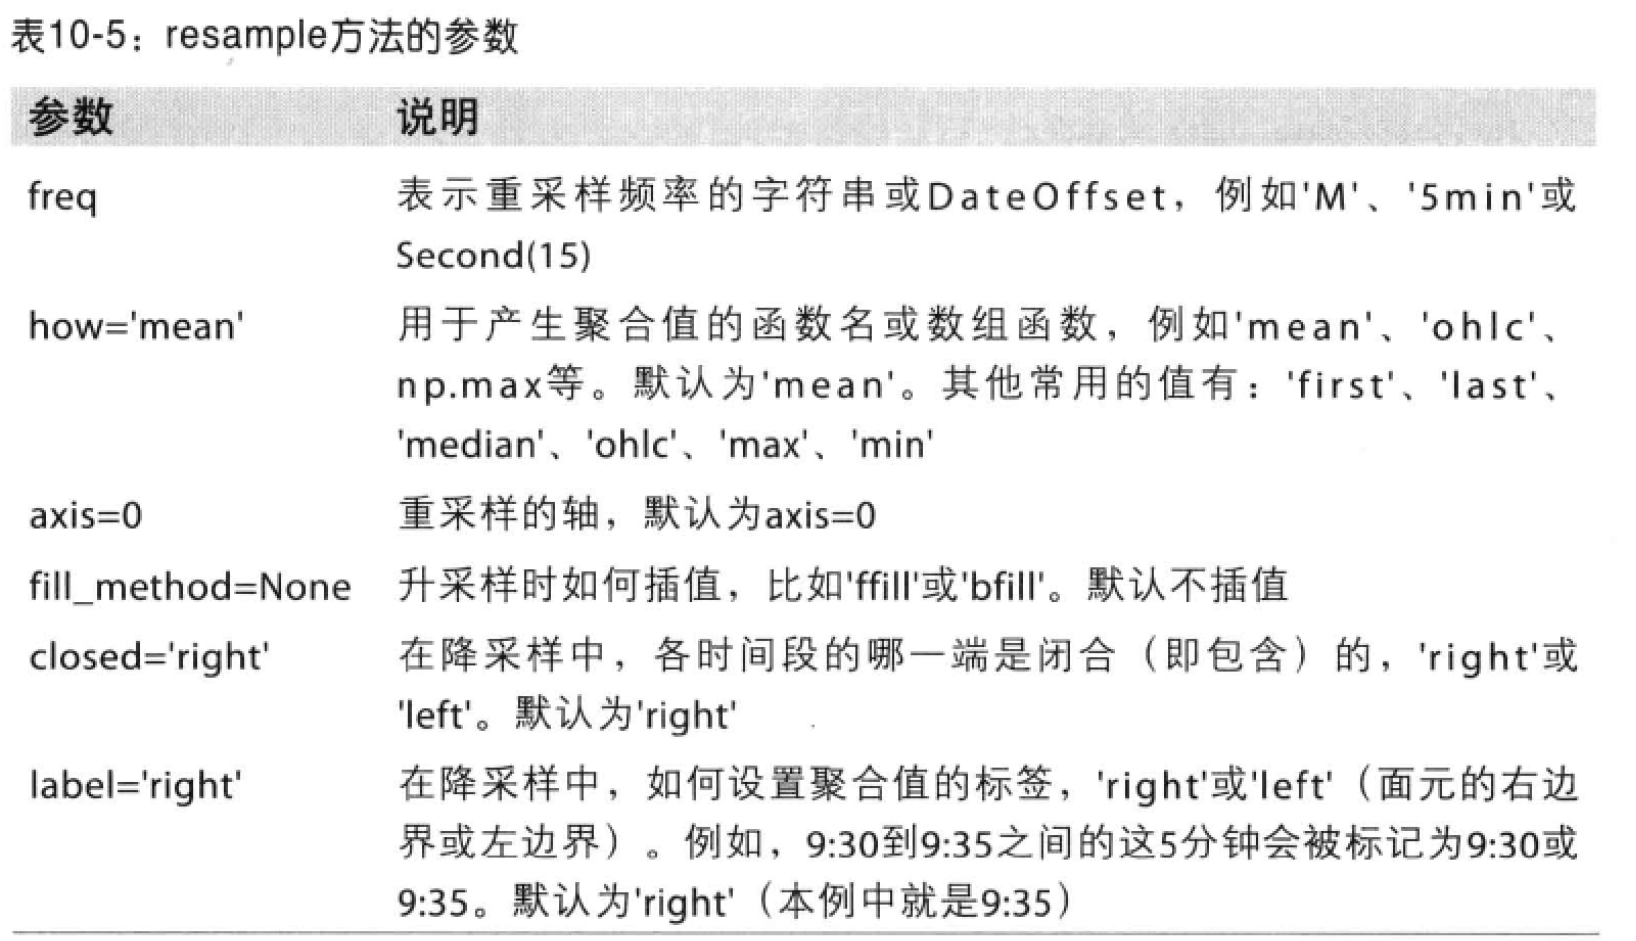
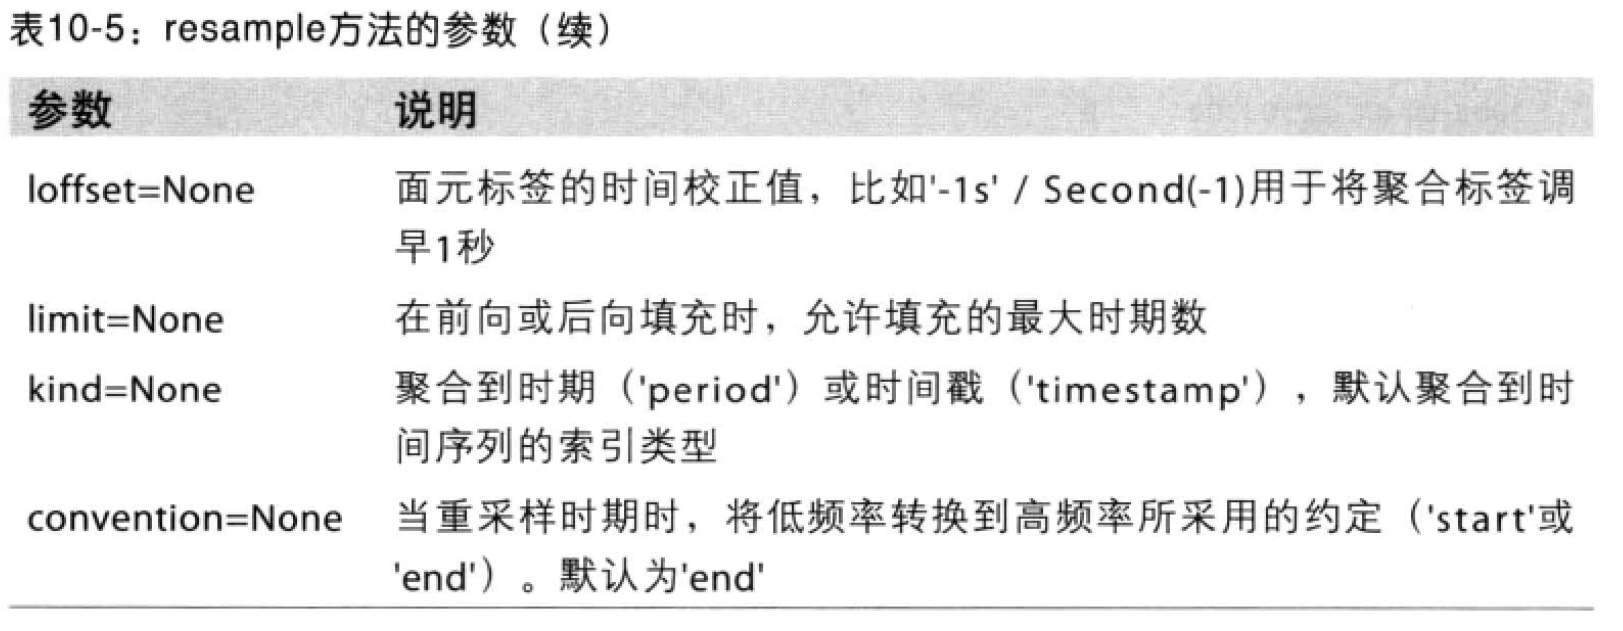

# 1 Downsampling（降采样）

把数据聚合为规律、低频度是一个很普通的时间序列任务。用于处理的数据不必是有固定频度的；我们想要设定的频度会定义箱界（bin edges），根据bin edges会把时间序列分割为多个片段，然后进行聚合。例如，转换为月度，比如'M'或'BM'，我们需要把数据以月为间隔进行切割。每一个间隔都是半开放的（half-open）；一个数据点只能属于一个间隔，所有间隔的合集，构成整个时间范围（time frame）。当使用resample去降采样数据的时候，有很多事情需要考虑：

- 在每个间隔里，哪一边要闭合
- 怎样对每一个聚合的bin贴标签，可以使用间隔的开始或结束

为了演示一下，下面用一个一分钟的数据来举例：

In [27]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

假设我们想要按5分钟一个数据块来进行聚合，然后对每一个组计算总和：
我们传入的频度定义了每个bin的边界按5分钟递增。默认，bin的左边界是闭合的，所以`00:00`值是属于`00:00`到`00:05`间隔的。设定closed='right'，会让间隔的右边闭合：

In [29]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [30]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

默认，每一个bin的左边的时间戳，会被用来作为结果里时间序列的标签。通过设置label='right'，我们可以使用bin右边的时间戳来作为标签：

In [17]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

可以看下图方便理解：
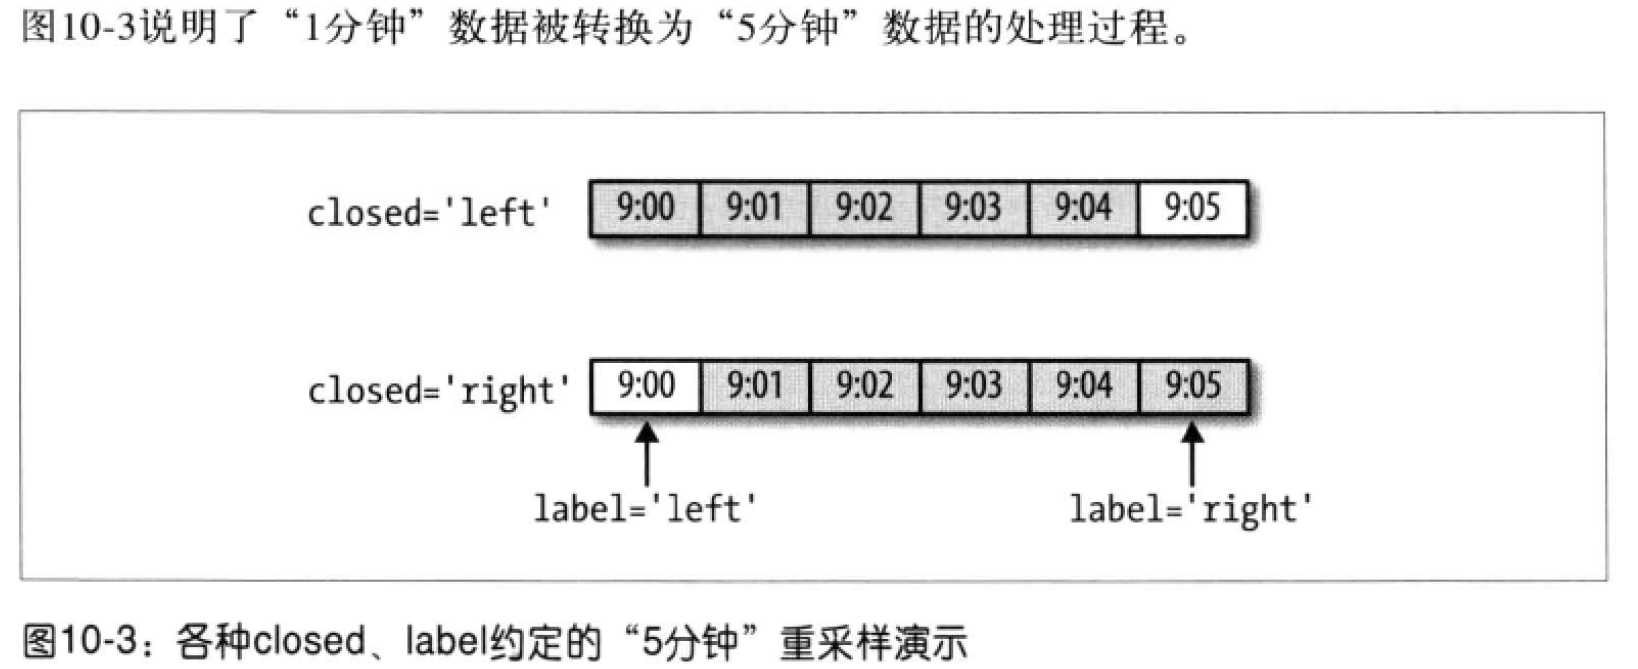
最后，我们可能想要对结果的索引进行位移，比如在右边界减少一秒。想要实现的话，传递一个字符串或日期偏移给loffset：

In [18]:
ts.resample('5min', closed='right', 
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

我们也可以使用shift方法来实现上面loffset的效果。

### Open-High-Low-Close (OHLC) resampling（股价图重取样）

>  Open-High-Low-Close: 开盘-盘高-盘低-收盘图；股票图；股价图

在经济界，一个比较流行的用法，是对时间序列进行聚合，计算每一个桶（bucket）里的四个值：first（open），last（close），maximum（high），minimal（low），即开盘-收盘-盘高-盘低，四个值。使用ohlc聚合函数可以得到这四个聚合结果：

### 通过groupby 进行重采样

In [34]:
rng = pd.date_range('1/1/2019', periods=100, freq='D')
ts = pd.Series(np.arange(100), index=rng)
ts.head()

2019-01-01    0
2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
Freq: D, dtype: int64

In [35]:
ts.groupby(lambda x:x.month).mean()

1    15.0
2    44.5
3    74.0
4    94.5
dtype: float64

In [36]:
ts.groupby(lambda x:x.weekday).mean()

0    51.5
1    49.0
2    50.0
3    47.5
4    48.5
5    49.5
6    50.5
dtype: float64

In [19]:
ts.resample('5min').ohlc()

open  high  low  close
2000-01-01 00:00:00     0     4    0      4
2000-01-01 00:05:00     5     9    5      9
2000-01-01 00:10:00    10    11   10     11

# 2 Upsampling and Interpolation（增采样和插值）

把一个低频度转换为高频度，是不需要进行聚合的。下面是一个有周数据的DataFrame：

In [20]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

Colorado     Texas  New York      Ohio
2000-01-05  0.138355  1.881517  0.655367  1.496932
2000-01-12 -1.125212 -0.824337  0.803721 -0.672660

当我们对这个数据进行聚合的的时候，每个组只有一个值，以及gap（间隔）之间的缺失值。在不使用任何聚合函数的情况下，我们使用asfreq方法将其转换为高频度：

In [21]:
df_daily = frame.resample('D').asfreq()
df_daily

Colorado     Texas  New York      Ohio
2000-01-05  0.138355  1.881517  0.655367  1.496932
2000-01-06       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -1.125212 -0.824337  0.803721 -0.672660

假设我们想要用每周的值来填写非周三的部分。这种方法叫做填充（filling）或插值（interpolation），可以使用fillna或reindex方法来实现重采样：

In [22]:
frame.resample('D').ffill()

Colorado     Texas  New York      Ohio
2000-01-05  0.138355  1.881517  0.655367  1.496932
2000-01-06  0.138355  1.881517  0.655367  1.496932
2000-01-07  0.138355  1.881517  0.655367  1.496932
2000-01-08  0.138355  1.881517  0.655367  1.496932
2000-01-09  0.138355  1.881517  0.655367  1.496932
2000-01-10  0.138355  1.881517  0.655367  1.496932
2000-01-11  0.138355  1.881517  0.655367  1.496932
2000-01-12 -1.125212 -0.824337  0.803721 -0.672660

我们可以选择只对一部分的周期进行填写：

In [23]:
frame.resample('D').ffill(limit=2)

Colorado     Texas  New York      Ohio
2000-01-05  0.138355  1.881517  0.655367  1.496932
2000-01-06  0.138355  1.881517  0.655367  1.496932
2000-01-07  0.138355  1.881517  0.655367  1.496932
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -1.125212 -0.824337  0.803721 -0.672660

注意，新的日期索引不能与旧的有重叠：

In [25]:
frame.resample('W-THU').ffill()

Colorado     Texas  New York      Ohio
2000-01-06  0.138355  1.881517  0.655367  1.496932
2000-01-13 -1.125212 -0.824337  0.803721 -0.672660

# 3 Resampling with Periods（对周期进行重采样）

对周期的索引进行重采样的过程，与之前时间戳的方法相似：

In [43]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
fra_1=frame[:1]
fra_1

Colorado     Texas  New York      Ohio
2000-01 -0.341111  0.588287 -1.639469  0.319648

In [27]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

Colorado     Texas  New York      Ohio
2000  0.208662 -0.109971 -0.233464  0.138465
2001 -0.401946  0.368050 -0.209196 -0.155851

增采样需要考虑的要多一些，比如在重采样前，选择哪一个时间跨度作为结束，就像asfreq方法那样。convertion参数默认是'start'，但也能用'end'：

In [28]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

Colorado     Texas  New York      Ohio
2000Q1  0.208662 -0.109971 -0.233464  0.138465
2000Q2  0.208662 -0.109971 -0.233464  0.138465
2000Q3  0.208662 -0.109971 -0.233464  0.138465
2000Q4  0.208662 -0.109971 -0.233464  0.138465
2001Q1 -0.401946  0.368050 -0.209196 -0.155851
2001Q2 -0.401946  0.368050 -0.209196 -0.155851
2001Q3 -0.401946  0.368050 -0.209196 -0.155851
2001Q4 -0.401946  0.368050 -0.209196 -0.155851

In [29]:
annual_frame.resample('Q-DEC', convention='end').ffill()

Colorado     Texas  New York      Ohio
2000Q4  0.208662 -0.109971 -0.233464  0.138465
2001Q1  0.208662 -0.109971 -0.233464  0.138465
2001Q2  0.208662 -0.109971 -0.233464  0.138465
2001Q3  0.208662 -0.109971 -0.233464  0.138465
2001Q4 -0.401946  0.368050 -0.209196 -0.155851

增采样和降采样的规则更严格一些：

- 降采样中，目标频度必须是原频度的子周期（subperiod）
- 增采样中，目标频度必须是原频度的母周期（superperiod）

如果不满足上面的规则，会报错。主要会影响到季度，年度，周度频度；例如，用Q-MAR定义的时间跨度只与A-MAR, A-JUN, A-SEP, A-DEC进行对齐（line up with）：

In [30]:
annual_frame.resample('Q-MAR').ffill()

Colorado     Texas  New York      Ohio
2000Q4  0.208662 -0.109971 -0.233464  0.138465
2001Q1  0.208662 -0.109971 -0.233464  0.138465
2001Q2  0.208662 -0.109971 -0.233464  0.138465
2001Q3  0.208662 -0.109971 -0.233464  0.138465
2001Q4 -0.401946  0.368050 -0.209196 -0.155851
2002Q1 -0.401946  0.368050 -0.209196 -0.155851
2002Q2 -0.401946  0.368050 -0.209196 -0.155851
2002Q3 -0.401946  0.368050 -0.209196 -0.155851

In [52]:
# 插值
insert_frame = pd.DataFrame(np.random.randn(2, 4),
                            index=pd.date_range('20190701',
                                                periods=2,
                                                freq='W'),
                            columns=['a', 'b', 'c', 'd'])
insert_frame.head()

a         b         c         d
2019-07-07 -1.498582 -0.690337  1.136729 -1.876090
2019-07-14  0.320752 -0.146645 -0.478544  1.543034

In [53]:
insert_frame.resample('D').asfreq()

a         b         c         d
2019-07-07 -1.498582 -0.690337  1.136729 -1.876090
2019-07-08       NaN       NaN       NaN       NaN
2019-07-09       NaN       NaN       NaN       NaN
2019-07-10       NaN       NaN       NaN       NaN
2019-07-11       NaN       NaN       NaN       NaN
2019-07-12       NaN       NaN       NaN       NaN
2019-07-13       NaN       NaN       NaN       NaN
2019-07-14  0.320752 -0.146645 -0.478544  1.543034

In [ ]:
插值算法后面介绍？？？？？？？

# 11.7 Moving Window Functions（移动窗口函数）

一种用于时间序列操作的重要用法，是使用滑窗（sliding windown）或呈指数降低的权重（exponentially decaying weights），来对时间序列进行统计值计算和其他一些函数计算。 这个对于消除噪声或有缺陷的数据是很有用的。这里我们称之为Moving Window Functions（移动窗口函数），不过其中也包括了不适用固定长度窗口的函数(functions without a fixed-length window)，比如指数加权移动平均数（exponentially weighted moving average）。和其他一些统计函数以后，这些函数也会自动无视缺失值。

我们先加载一些时间序列数据并按工作日频度进行重采样：

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
! cat examples/stock_px_2.csv | head -n 5

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.4,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,7.43,21.93,28.95,922.93
cat: write error: Broken pipe


In [56]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

close_px = close_px.resample('B').ffill()
close_px.head()

AAPL   MSFT    XOM
2003-01-02  7.40  21.11  29.22
2003-01-03  7.45  21.14  29.24
2003-01-06  7.45  21.52  29.96
2003-01-07  7.43  21.93  28.95
2003-01-08  7.28  21.31  28.83

接下面介绍rolling操作符，效果和resample及groupby一样。通过window（用于表示周期的数字），这个操作符可以在Series或DataFrame上调用：

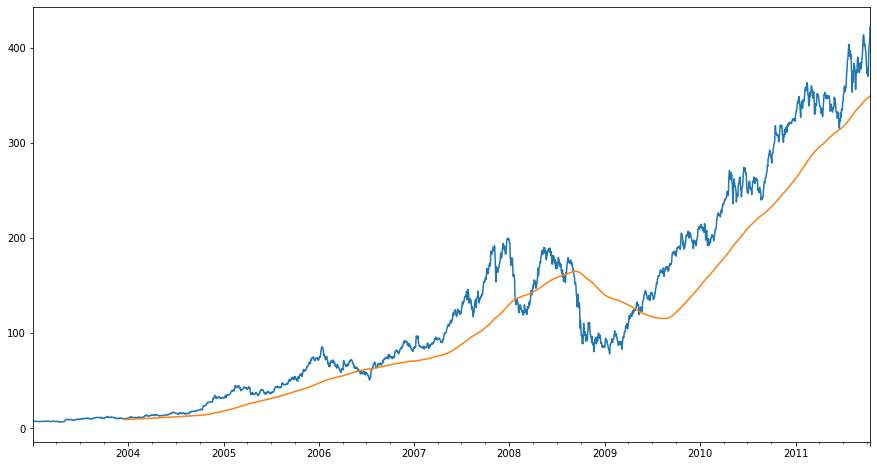

In [57]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot(figsize=(15, 8))

这里的`rolling(250)`和groupby的效果一样，但并不是直接进行分组，而是创建了一个新的对象，并在一个有250天的滑窗上进行了分组。所以这里对于苹果的股价，我们得到了一个250天移动窗口平均值（moving window average）。

默认情况下滚动函数（rolling functions）需要窗口中所有的值为non-NA。如果有缺失值的话，我们会得到更少的windown周期：

In [59]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

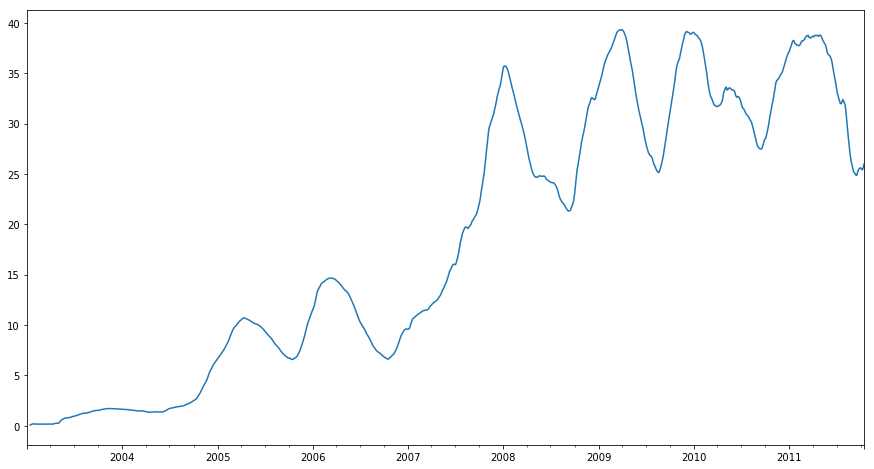

In [28]:
appl_std250.plot(figsize=(15, 8))

为了计算扩张窗口平均（expanding window mean），我们要使用expanding操作符，而不是用rolling。这个扩张平均的时间窗口是从时间序列开始的地方作为开始，窗口的大小会逐渐递增，直到包含整个序列。一个扩张窗口平均在时间序列上的计算像下面这样，我们拿apple_std250来做例子：

In [61]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.076128
2003-01-17    0.088208
Freq: B, Name: AAPL, dtype: float64

在一个DataFrame上的每一列调用移动窗口函数：

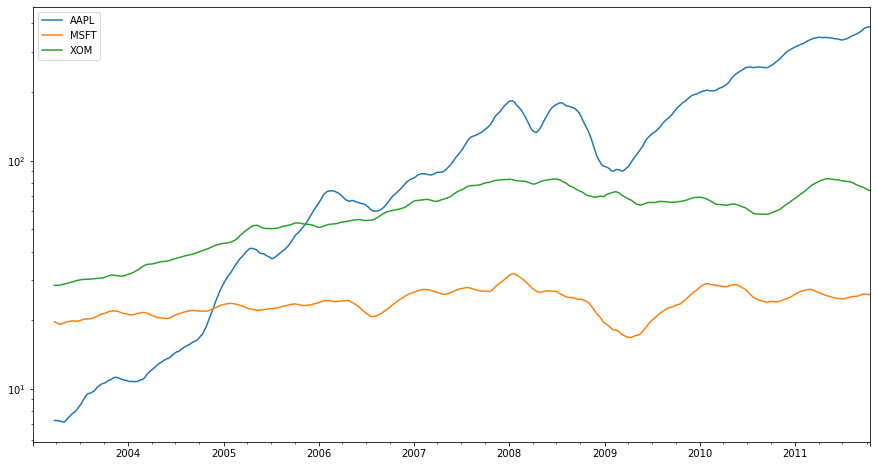

In [62]:
close_px.rolling(60).mean().plot(logy=True, figsize=(15, 8))

rolling函数也接收字符串，用来指定一个大小固定的时间偏移量（fixed-size time offset），而不是用一组周期数字（a set number of periods）来表示。使用这种计划对于没有规律的时间序列很有用。同样的字符串也可以传递给resample使用。例如，我们可以计算一个20天的滑动平均（rolling mean）：

> 译者：在运行下面的代码时，出现了报错，发现是pandas版本的问题，运行`conda update numpy`会把包括numpy，pandas之类的很多库进行更新，之后就不会报错了

In [63]:
rolling_mean = close_px.rolling('20D').mean()
print(rolling_mean.head())
print(rolling_mean.tail())

                AAPL       MSFT        XOM
2003-01-02  7.400000  21.110000  29.220000
2003-01-03  7.425000  21.125000  29.230000
2003-01-06  7.433333  21.256667  29.473333
2003-01-07  7.432500  21.425000  29.342500
2003-01-08  7.402000  21.402000  29.240000
                  AAPL       MSFT        XOM
2011-10-10  389.351429  25.602143  72.527857
2011-10-11  388.505000  25.674286  72.835000
2011-10-12  388.531429  25.810000  73.400714
2011-10-13  388.826429  25.961429  73.905000
2011-10-14  391.038000  26.048667  74.185333


# 1 Exponentially Weighted Functions（指数权重函数）

另一个用相同权重计算固定窗口大小的方法是指定一个常数衰减因子（constant decay factor），把更多的权重给最近观测到的数据上。有很多方法可以指定衰减引子，一种方法是用span，生成的结果与滑动窗口函数是有可比性的，当然，窗口大小与span的大小要一致。
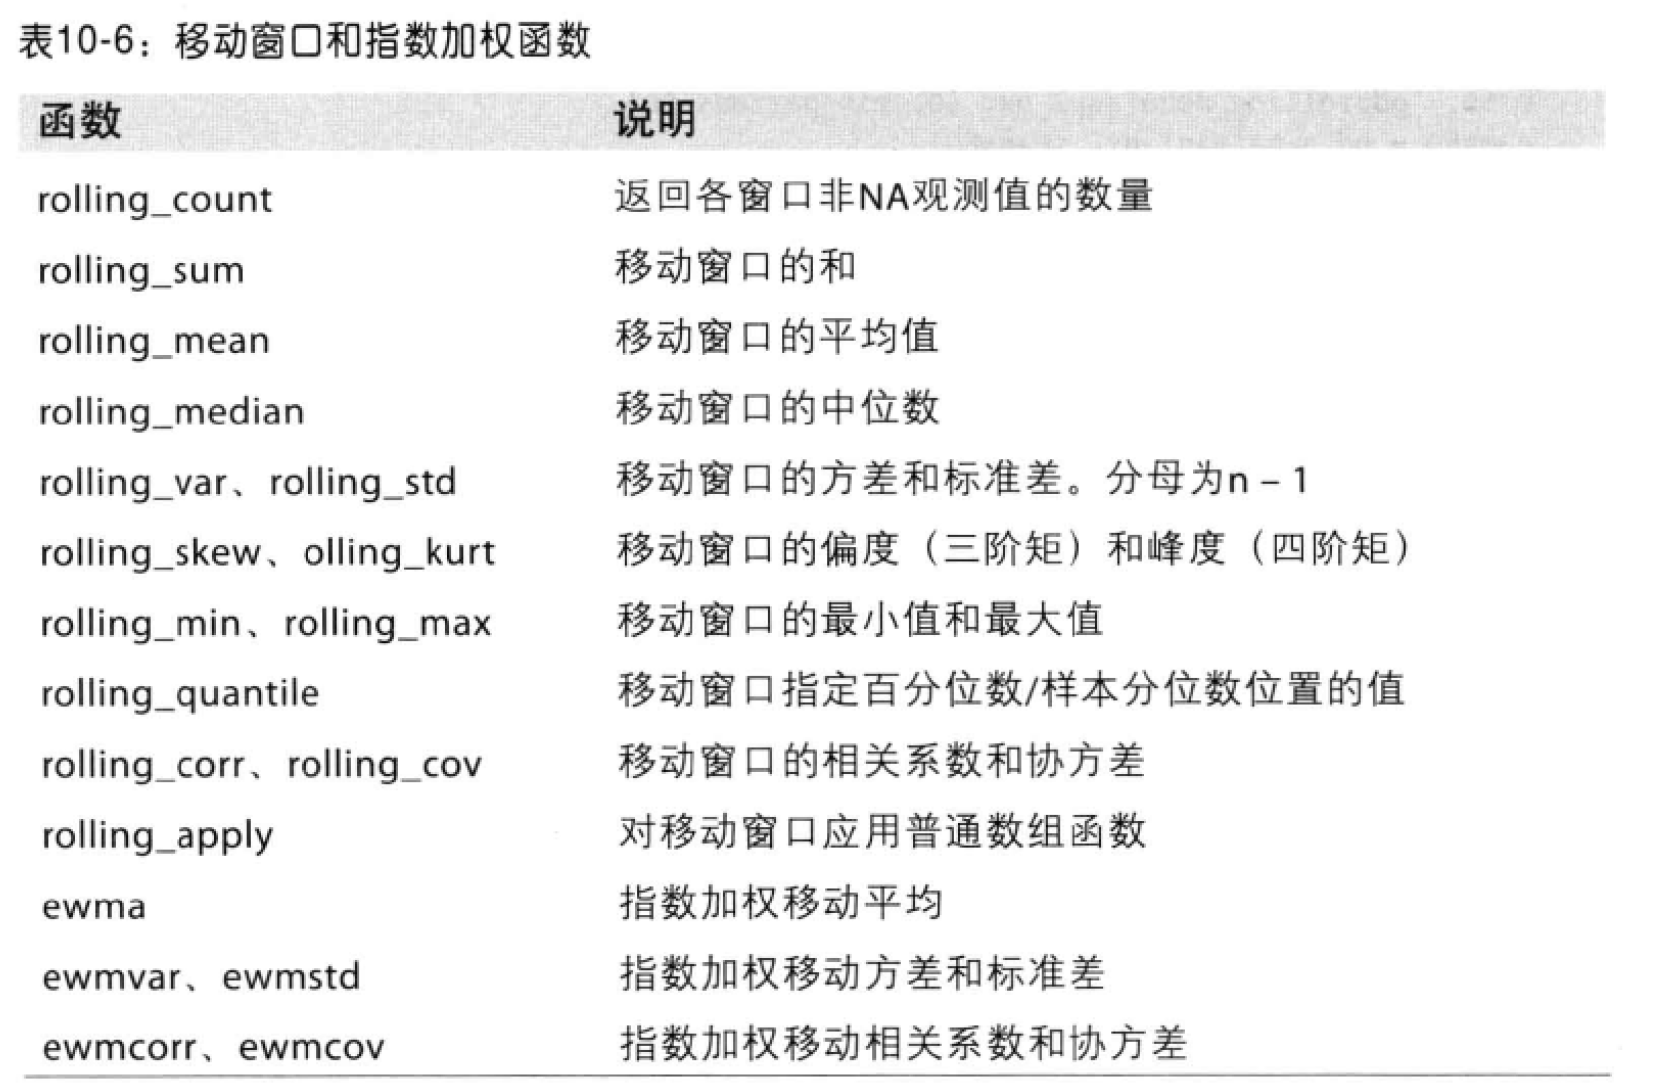
因为一个指数权重统计方法会把更大的权重基于最近观测到的数据上，这种方法带来的变化比平均权重方法要快很多。

pandas有一个ewm操作符，可以与rolling和expanding一起使用。这里有一个例子，在设置EW移动平均（moving average）为span=60的情况下，比较苹果股价的60天移动平均：

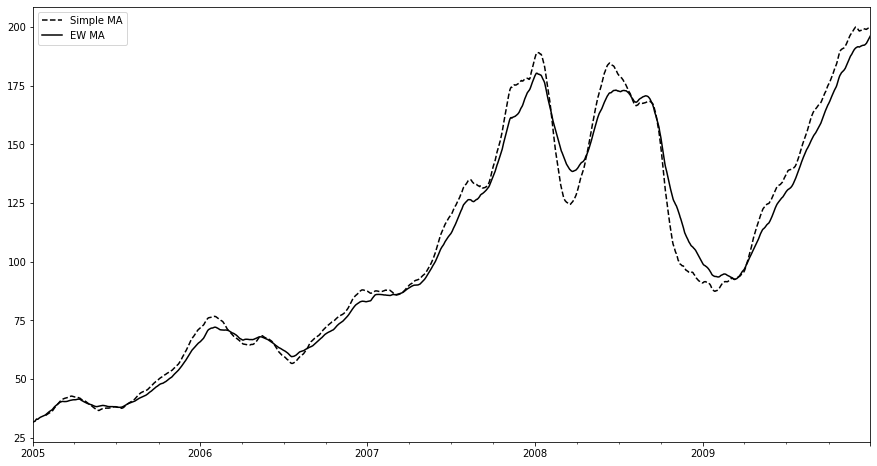

In [76]:
aapl_px = close_px.AAPL['2005':'2009']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewm60 = aapl_px.ewm(span=60).mean()
ewm60.head()
# draw 简单移动和指数加权移动平均
ma60.plot(style='k--', label='Simple MA', figsize=(15, 8))
ewm60.plot(style='k-', label='EW MA', figsize=(15, 8))
plt.legend()

# 2 Binary Moving Window Functions（二元移动窗口函数）

一些统计计算符，比如相关性和协方差，需要在两个时间序列上进行计算。例如，经济分析通常喜欢比较一只股票与基础指数标普500之间的相关性。我们先计算一下时间序列的百分比变化：

In [77]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

在我们调用rolling后，corr聚合函数会去计算spx_rets的滚动相关性（rolling correlation）：

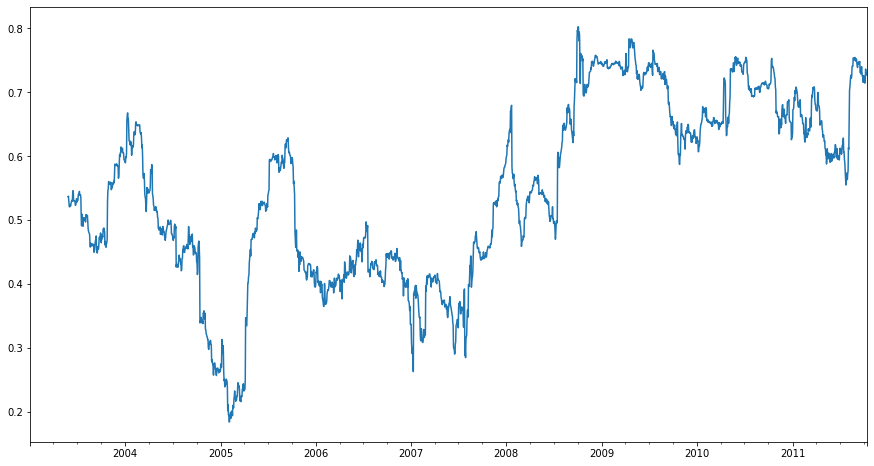

In [78]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot(figsize=(15, 8))

假设我们想要一次计算很多股票与标普500指数的相关性。写一个循环，创建一个新的DataFrame虽然简单但是重复性高，所以我们可以传入一个Series和DataFrame，然后用rolling_corr这样的函数来计算每一列与Series的相关性（在这里例子里，Series指的是spx_rets）：

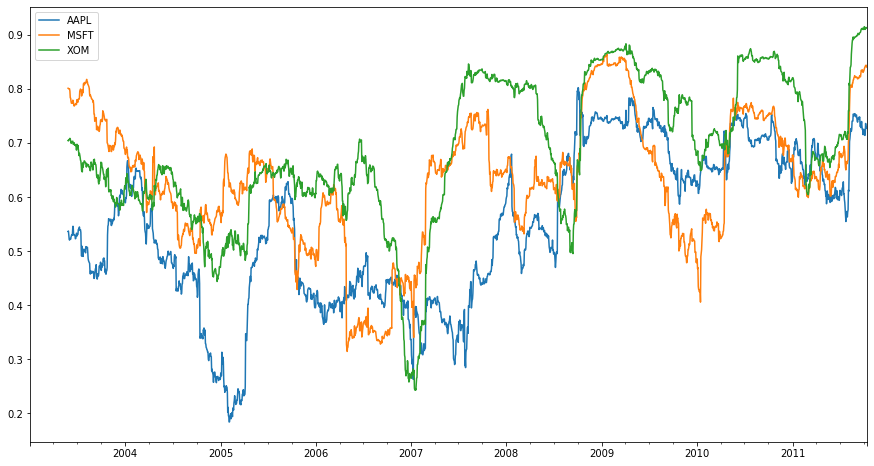

In [79]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot(figsize=(15, 8))

# 3 User-Defined Moving Window Functions（用户自定义的移动窗口函数）

在rolling上使用apply或其他一些方法，可以在自己设计的移动窗口上应用函数。唯一需要满足的是，在数组的每一个片段上，函数必须产生单个值。例如，如我们想要用`rolling(...).quantile(q)`计算样本分位数，我们可能对于某个特定值的分位数排名感兴趣。scipy.stats.percentileofscore函数就是用来做这个的：

In [80]:
from scipy.stats import percentileofscore

In [82]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent,raw=True)

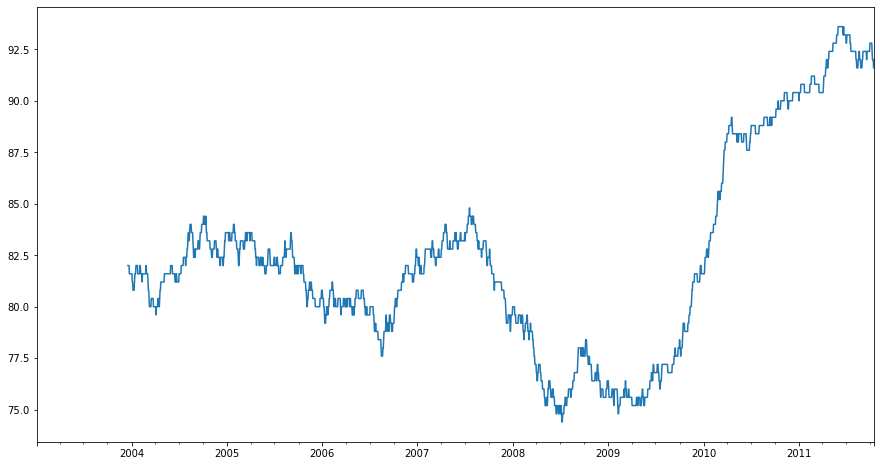

In [83]:
result.plot(figsize=(15, 8))

时间序列需要结合现实项目好好加深掌握